# Ordinal Encoding with Housing Prices

## 1. Reading, cleaning & splitting

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config

original_housing_df = pd.read_csv('housing_iteration_3_classification.csv')
original_housing_df.head()

# X and y creation
X = original_housing_df.copy()#.drop(columns="LotFrontage")
y = X.pop("Expensive")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   MSZoning      1460 non-null   object 
 10  Condition1    1460 non-null   object 
 11  Heating       1460 non-null   object 
 12  Street        1460 non-null   object 
 13  CentralAir    1460 non-null   object 
 14  Foundation    1460 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 171.2+ KB


In [39]:
X['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [10]:
X['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [11]:
X['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [12]:
X['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [13]:
X['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
X['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [99]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

## 2. Building the `preprocessor`

We have included all the code to create the preprocessing pipeline in a single cell for compactness. Take your time to understand what's going on. If needed, create multiple cells and bring the code there step by step, analyzing the output each time. Writing a sketch of the pipeline with pen an paper is also a good idea.

In [100]:
# 0. Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")


# 1. defining categorical & numerical columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# 2. numerical pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

# 3. categorical pipeline

# # 3.1 defining ordinal & onehot columns
# .get_indexer() get's the index to solve the problem described above about losing column names
ordinal_cols = ['Street','CentralAir','Foundation']
onehot_cols = ['Heating', 'MSZoning','Condition1']

# # 3.2. defining the categorical encoder

# # # 3.2.1. we manually establish the order of the categories for our ordinal feature (Cabin), including "N_A"
street_cats = ['N_A', 'Grvl', 'Pave']
central_air_cats = ['N_A', 'N', 'Y']
foundation_cats = ['N_A', 'Slab', 'BrkTil', 'CBlock', 'Wood', 'Stone', 'PConc']



# # # 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=[street_cats,central_air_cats,foundation_cats]), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),
    ]
)

# # 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )

# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

full_preprocessing

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('columntransf...
                                                                                   OrdinalEncoder(categories=[['N_A',
                                                                                                               'Grvl',
                                                                                                               'Pave'],
                                                                                                              ['N_A',
                                                                                                               'N',
                                                                                                               'Y'],
                                                                                                              ['N_A',
                                                                                                               'Slab',
                                                                                                               'BrkTil',
                                                                                                               'CBlock',
                                                                                                               'Wood',
                                                                                                               'Stone',
                                                                                                               'PConc']]),
                                                                                   ['Street',
                                                                                    'CentralAir',
                                                                                    'Foundation']),
                                                                                  ('cat_onehot',
                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                 sparse_output=False),
                                                                                   ['Heating',
                                                                                    'MSZoning',
                                                                                    'Condition1'])]))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

## 3. Decision Tree

In [101]:
from sklearn.model_selection import GridSearchCV

# full pipeline: preprocessor + model
full_pipeline = make_pipeline(full_preprocessing,
                              DecisionTreeClassifier())

# define parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2),
        'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
        'decisiontreeclassifier__criterion':['gini', 'entropy']
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


{'dtree': 0.9212317963390925}

In [102]:
best_param = search.best_params_
best_param

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 33}

In [103]:
# training accuracy
y_train_pred = search.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9383561643835616

In [ ]:
0.949486301369863

In [104]:
# testing accuracy
y_test_pred = search.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9246575342465754

In [ ]:
0.9143835616438356

## 4. Error analysis

In [105]:
accuracy_score(search.predict(X_test), y_test)

0.9246575342465754

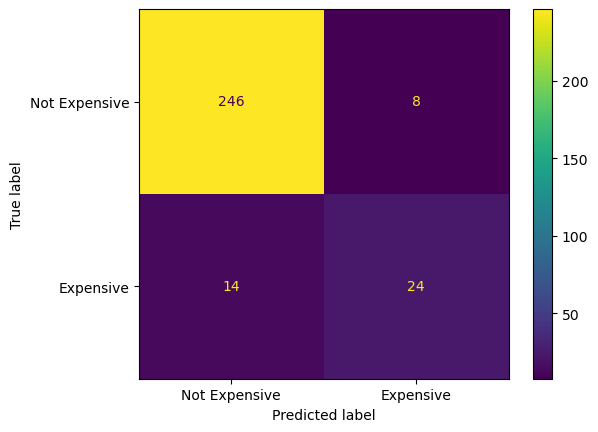

In [106]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

## 5. KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  KNeighborsClassifier()
                                 )

In [96]:
import warnings
from sklearn.model_selection import GridSearchCV

# Filter out the specific warning by specifying its category
warnings.filterwarnings("ignore", category=UserWarning, message="Scoring failed.")
warnings.filterwarnings("ignore", category=UserWarning, message="One or more of the test scores are non-finite")


param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50, 2),
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "standardscaler__with_std":[True, False]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

scores["knn"] = knn_search.best_score_

scores

# Reset the warning filter
warnings.filterwarnings("default", category=UserWarning)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [97]:
knn_search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 18,
 'kneighborsclassifier__weights': 'distance',
 'standardscaler__with_std': True}